In [10]:
%matplotlib inline

In [11]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
import snhostspec
from glob import glob

Read in all the Subaru PFS S/N spectra, and evaluate whether we get a redshift.  Store the outputs in a simple ascii table.

In [15]:
reload(snhostspec)
snrspeclist = glob('etcout/subaruPFS_SNR*dat')
z = []
mag = []
gotz = []
snrbest = []
snrbest_waverest = []
snrbest_binsize = []
exptime = []
for snrspecfile in snrspeclist:
    snrspec = snhostspec.SubaruObsSim(snrspecfile)
    snrspec.verbose=0
    # snrspec.plot(marker=' ', frame='rest', showspec=True, ls='-', lw=0.7)
    snrspec.check_redshift(snrthresh=4, showplot=False)
    z.append(snrspec.z)
    mag.append(snrspec.mag)
    exptime.append(snrspec.exptime_hours)
    gotz.append(snrspec.redshift_detected)
    snrbest.append(snrspec.bestsnr)
    snrbest_waverest.append(snrspec.bestsnr_waverest)
    snrbest_binsize.append(snrspec.bestbinsize)
snrchecktable = Table(data=[z, mag, exptime, gotz, snrbest, snrbest_waverest, snrbest_binsize], 
                     names=['z','mag','exptime','gotz','snrbest','snrbest_waverest', 'snrbest_binsize'])
snrchecktable.write('wfirst_snhostspec_redshiftcheck.dat', format='ascii.commented_header')

Make a plot showing the host spectra that get a redshift detection and those that don't, as a function of z.

(0.7, 2.4)

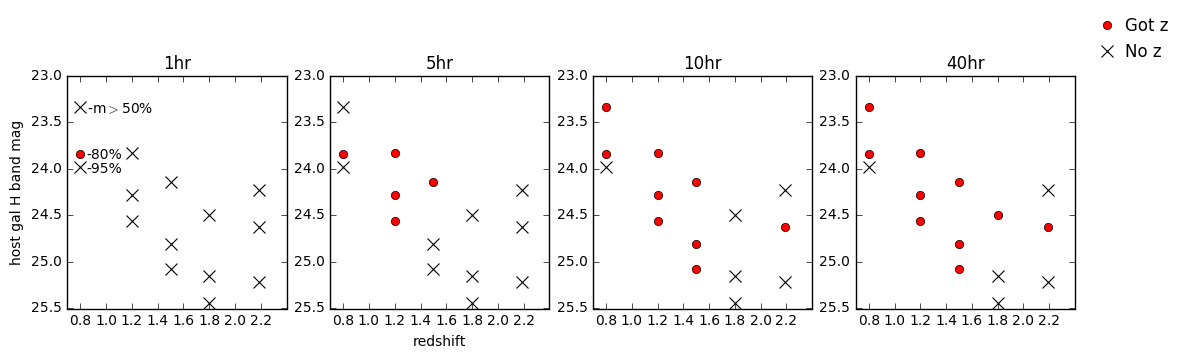

In [26]:
zcheck = ascii.read('wfirst_snhostspec_redshiftcheck.dat', 
                    format='commented_header')
fig = plt.figure(figsize=[13,3])
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(1,4,3, sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(1,4,4, sharex=ax1, sharey=ax1)
for et, ax  in zip([1, 5, 10,40], [ax1,ax2,ax3,ax4]):
    ietwin = np.where((zcheck['exptime']==et) & (zcheck['gotz']>0))[0]
    ietfail = np.where((zcheck['exptime']==et) & (zcheck['gotz']<1))[0]
    ax.plot(zcheck['z'][ietwin], zcheck['mag'][ietwin], 'ro', ls=' ', label='Got z')
    ax.plot(zcheck['z'][ietfail], zcheck['mag'][ietfail], 'kx', ms=8, mew=0.8, ls=' ', label='No z')
ax1.invert_yaxis()
ax1.set_title('1hr')
ax2.set_title('5hr')
ax3.set_title('10hr')
ax4.set_title('40hr')
ax1.set_ylabel('host gal H band mag')
ax2.set_xlabel('redshift')
ax4.legend(loc='lower left', numpoints=1, handletextpad=0.1, frameon=False,
           bbox_to_anchor=[1.0,1.0], bbox_transform=ax4.transAxes)
ax1.text(0.85, 23.35, "-m$>$50%", ha='left', va='center')
ax1.text(0.85, 23.85, "-80%", ha='left', va='center')
ax1.text(0.85, 24.0, "-95%", ha='left', va='center')
ax1.set_xlim(0.7,2.4)

Initiliazed an empty WfirstSimData object


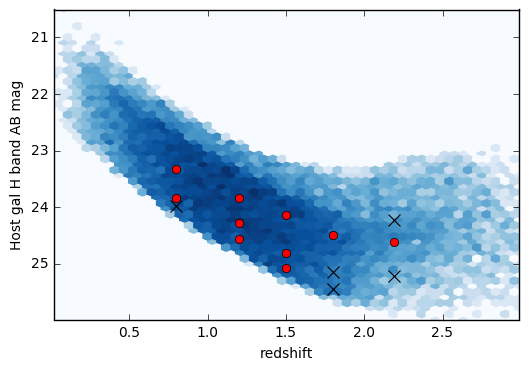

In [35]:
sim = snhostspec.SnanaSimData()
sim.load_simdata_catalog('wfirst_snhostspec_master.cat')
ax = pl.gca()
x = sim.simdata['zsim']
y = sim.simdata['magsim']
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='Blues')
ax.invert_yaxis()
ietwin = np.where((zcheck['exptime']==40) & (zcheck['gotz']>0))[0]
ietfail = np.where((zcheck['exptime']==40) & (zcheck['gotz']<1))[0]
ax.plot(zcheck['z'][ietwin], zcheck['mag'][ietwin], 'ro', ls=' ', label='Got z')
ax.plot(zcheck['z'][ietfail], zcheck['mag'][ietfail], 'kx', ms=8, mew=0.8, ls=' ', label='No z')
ax.set_xlabel('redshift')
ax.set_ylabel('Host gal H band AB mag')
